C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[15371  1162]
 [ 2303  2980]]


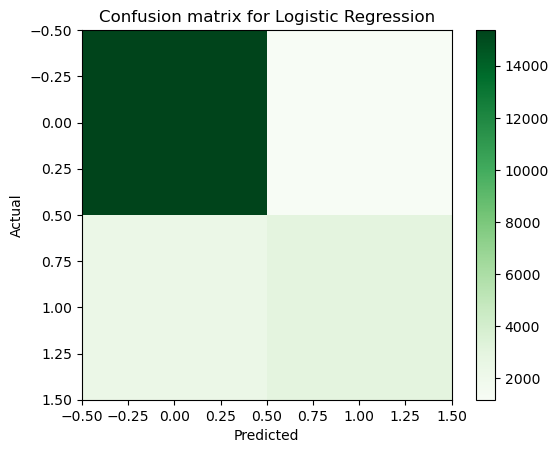

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     16533
           1       0.72      0.56      0.63      5283

    accuracy                           0.84     21816
   macro avg       0.79      0.75      0.77     21816
weighted avg       0.83      0.84      0.83     21816



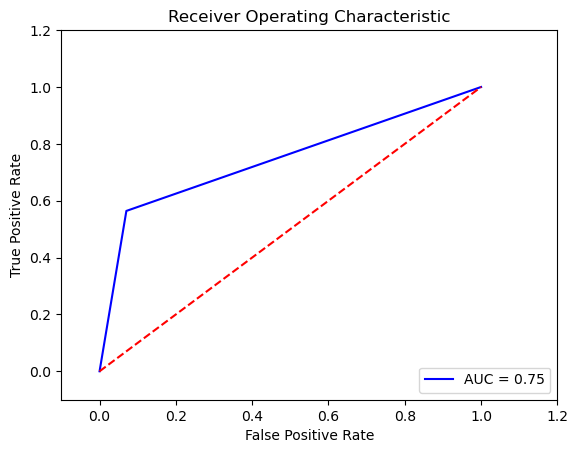

[0.         0.07028368 1.        ]
[0.         0.56407344 1.        ]


In [6]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_curve, auc


dataframe = pd.read_csv("census-income-encoded.csv")

X = dataframe.iloc[1:, :-1]  # All rows except the first one, all columns except the last one
y = dataframe.iloc[1:, -1]  # All rows except the first one, the last column

# Convert labels to numeric format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.67, random_state=42)
X.describe()
# Create and fit the classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
plt.imshow(cm, cmap='Greens')
plt.title('Confusion matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.show()

print(classification_report(y_test, y_pred))

# Calculate ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(false_positive_rate)
print(true_positive_rate)
